# Getting Started with LineaPy

Welcome to LineaPy! LineaPy is a Python package for capturing, analyzing, and automating data science workflows. At a high level, LineaPy traces the sequence of code execution to form a comprehensive understanding of the code and its context. This understanding allows LineaPy to provide a set of tools that help data scientists bring their work to production more quickly and easily, with as little as *two lines* of code.

In this tutorial, we will look at a simple example using the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to demonstrate how to use LineaPy to 1) store a variable's history, 2) get its cleaned-up code, and 3) build an executable pipeline for the variable.

**Table of Contents**

- [Installing LineaPy](#Installing-LineaPy)
- [Running LineaPy](#Running-LineaPy)
- [Example](#Example)
- [Recap](#Recap)
- [What Next](#What-Next)

<div class="admonition info" style="background:#F0FAFA">
    <p class="admonition-title"><b>Info</b></p>
    <p>
        If you encounter issues you cannot resolve, simply ask in our <a href="https://join.slack.com/t/lineacommunity/shared_invite/zt-18kizfn3b-1Qu_HDT3ahGudnAwoFAw9Q">Slack community</a>'s <code>#support</code> channel. We are always happy and ready to help you!
    </p>
</div>

<div class="admonition note" style="background:#F0F4FA">
    <p class="admonition-title"><b>Note</b></p>
    <p>
        You can ignore <code># NBVAL_*</code> comments in certain cell blocks. They are for passing unit tests only, which we do to make sure the examples are always functional as we update the codebase.
    </p>
</div>

## Installing LineaPy

To install LineaPy, run `pip install lineapy`, like so (adapted to install from Jupyter, along with other packages for the tutorial):

In [ ]:
#NBVAL_SKIP
!pip -q install lineapy~=0.2 scikit-learn pandas matplotlib

<div class="admonition info" style="background:#F0FAFA">
    <p class="admonition-title"><b>Info</b></p>
    <p>
        For more information about installation, check this <a href="https://docs.lineapy.org/en/main/guides/installation.html">page</a> in the project documentation.
    </p>
</div>

## Running LineaPy

To use LineaPy in an interactive computing environment such as Jupyter Notebook/Lab or IPython, load its extension by executing `%load_ext lineapy` at the top of your session, like so:

In [ ]:
#NBVAL_SKIP
%load_ext lineapy

Please note:

- You must run this as the first command in a given session. Executing it in the middle of a session will lead to erroneous behaviors by LineaPy.

- This command loads the extension for the current session only. It does not carry over to different sessions, so you will need to repeat it for each new session.

<div class="admonition info" style="background:#F0FAFA">
    <p class="admonition-title"><b>Info</b></p>
    <p>
        For information about running LineaPy in different interfaces, check this <a href="https://docs.lineapy.org/en/main/guides/interfaces.html">page</a> in the project documentation.
    </p>
</div>

## Example

The following development code fits a linear regression model to the Iris dataset:

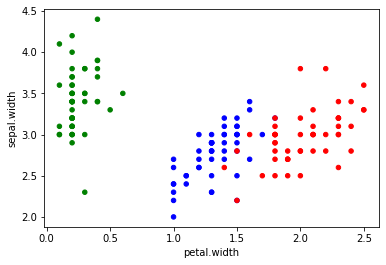

LinearRegression()

In [1]:
# NBVAL_IGNORE_OUTPUT

import lineapy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
url = "https://raw.githubusercontent.com/LineaLabs/lineapy/main/examples/tutorials/data/iris.csv"
df = pd.read_csv(url)

# Map each species to a color
color_map = {"Setosa": "green", "Versicolor": "blue", "Virginica": "red"}
df["variety_color"] = df["variety"].map(color_map)

# Plot petal vs. sepal width by species
df.plot.scatter("petal.width", "sepal.width", c="variety_color")
plt.show()

# Create dummy variables encoding species
df["d_versicolor"] = df["variety"].apply(lambda x: 1 if x == "Versicolor" else 0)
df["d_virginica"] = df["variety"].apply(lambda x: 1 if x == "Virginica" else 0)

# Initiate the model
mod = LinearRegression()

# Fit the model
mod.fit(
    X=df[["petal.width", "d_versicolor", "d_virginica"]],
    y=df["sepal.width"],
)

Let's say you're happy with your above code, and you've decided to save the trained model. You can store the model as a LineaPy [artifact](https://docs.lineapy.org/en/main/concepts/artifact.html) with the following code:

In [2]:
# NBVAL_IGNORE_OUTPUT

# Save the model as an artifact
lineapy.save(mod, "iris_model")

LineaArtifact(name='iris_model', _version=0)

A LineaPy artifact encapsulates both the value *and* code, so you can easily retrieve the model's code, like so:

In [3]:
# Retrieve the model artifact
artifact = lineapy.get("iris_model")

# Check code for the model artifact
print(artifact.get_code())

import pandas as pd
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/LineaLabs/lineapy/main/examples/tutorials/data/iris.csv"
df = pd.read_csv(url)
color_map = {"Setosa": "green", "Versicolor": "blue", "Virginica": "red"}
df["variety_color"] = df["variety"].map(color_map)
df["d_versicolor"] = df["variety"].apply(lambda x: 1 if x == "Versicolor" else 0)
df["d_virginica"] = df["variety"].apply(lambda x: 1 if x == "Virginica" else 0)
mod = LinearRegression()
mod.fit(
    X=df[["petal.width", "d_versicolor", "d_virginica"]],
    y=df["sepal.width"],
)



Note that these are the minimal essential steps to produce the model. That is, LineaPy has automatically
cleaned up the original code by removing extraneous operations that do not affect the model (e.g., plotting).

<div class="admonition info" style="background:#F0FAFA">
    <p class="admonition-title"><b>Info</b></p>
    <p>
        To learn more about LineaPy artifacts and how to work with them, check this <a href="https://docs.lineapy.org/en/main/tutorials/01_using_artifacts.html">tutorial</a>.
    </p>
</div>

Let's say you're asked to retrain the model on a regular basis to account for any updates in the source data.
You need to set up a pipeline to train the model &mdash; LineaPy makes this as simple as a single function call:

In [4]:
# NBVAL_IGNORE_OUTPUT

# Build an Airflow pipeline using artifact(s)
lineapy.to_pipeline(
    artifacts=["iris_model"],
    input_parameters=["url"],  # Specify variable(s) to parametrize
    pipeline_name="iris_model_pipeline",
    output_dir="output/",
    framework="AIRFLOW",
)

Generated module file: output/iris_model_pipeline_module.py                                                                                                                                             
Generated requirements file: output/iris_model_pipeline_requirements.txt                                                                                                                                
Generated DAG file: output/iris_model_pipeline_dag.py                                                                                                                                                   
Generated Docker file: output/iris_model_pipeline_Dockerfile                                                                                                                                            


PosixPath('output')

This command generates several files that can be used to execute the pipeline from the UI or CLI:

In [5]:
# NBVAL_IGNORE_OUTPUT

# Check the generated files for running the pipeline
import os
os.listdir("output/")

['iris_model_pipeline_Dockerfile',
 'iris_model_pipeline_dag.py',
 'iris_model_pipeline_module.py',
 'iris_model_pipeline_requirements.txt']

In short, LineaPy automates time-consuming, manual steps in a data science workflow, helping us get
our work to production more quickly and easily.

<div class="admonition info" style="background:#F0FAFA">
    <p class="admonition-title"><b>Info</b></p>
    <p>
        To learn more about LineaPy's pipeline support, check this <a href="https://docs.lineapy.org/en/main/tutorials/02_pipeline_building.html">tutorial</a>.
    </p>
</div>

## Recap

What makes LineaPy special is that it treats an artifact as both code and value. That is, when storing an artifact, LineaPy not only records the state (i.e., value) of the variable but also traces and saves all relevant operations leading to this state &mdash; as code. Such a complete development history or lineage then allows LineaPy to fully reproduce the given artifact. Furthermore, it provides the ground to automate time-consuming, manual steps in a data science workflow such as code cleanup and pipeline building, facilitating transition to production and impact.

## What Next

Excited? Continue to learn basic functionalities of LineaPy artifacts in this [tutorial](https://docs.lineapy.org/en/main/tutorials/01_using_artifacts.html).